# Netflix Userbase Analysis

In [3]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#import dataset

df=pd.read_csv("Netflix Userbase.csv")
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


*Modifying Data type*

In [6]:
df['Last Payment Date'] = pd.to_datetime(df['Last Payment Date'], dayfirst=True, format='%d-%m-%y')
df['Join Date'] = pd.to_datetime(df['Join Date'], dayfirst=True, format='%d-%m-%y')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User ID            2500 non-null   int64         
 1   Subscription Type  2500 non-null   object        
 2   Monthly Revenue    2500 non-null   int64         
 3   Join Date          2500 non-null   datetime64[ns]
 4   Last Payment Date  2500 non-null   datetime64[ns]
 5   Country            2500 non-null   object        
 6   Age                2500 non-null   int64         
 7   Gender             2500 non-null   object        
 8   Device             2500 non-null   object        
 9   Plan Duration      2500 non-null   object        
dtypes: datetime64[ns](2), int64(3), object(5)
memory usage: 195.4+ KB


***Number of Users By Country***

C:\Users\DELL\AppData\Local\Temp\ipykernel_17964\256709462.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='User ID', data=sum_users_by_country, palette='Blues_d')


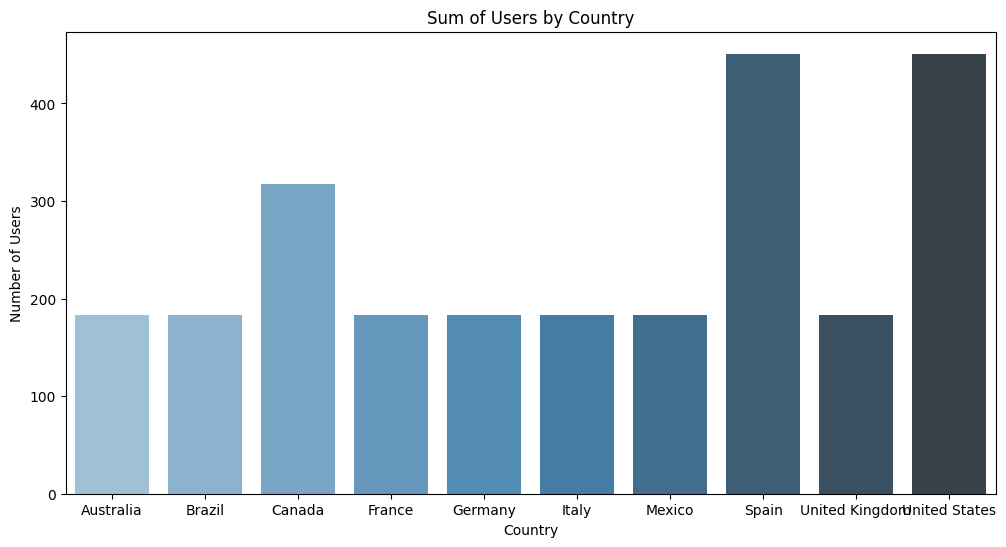

In [8]:
sum_users_by_country = df.groupby('Country')['User ID'].count().reset_index()


plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='User ID', data=sum_users_by_country, palette='Blues_d')
plt.title('Sum of Users by Country')
plt.xlabel('Country')
plt.ylabel('Number of Users')
plt.show()

In [9]:
sum_users_by_country

,Country,User ID
0,Australia,183
1,Brazil,183
2,Canada,317
3,France,183
4,Germany,183
5,Italy,183
6,Mexico,183
7,Spain,451
8,United Kingdom,183
9,United States,451


***Subscription Type Distribution***

In [10]:
df["Subscription Type"].value_counts()

Subscription Type
Basic       999
Standard    768
Premium     733
Name: count, dtype: int64

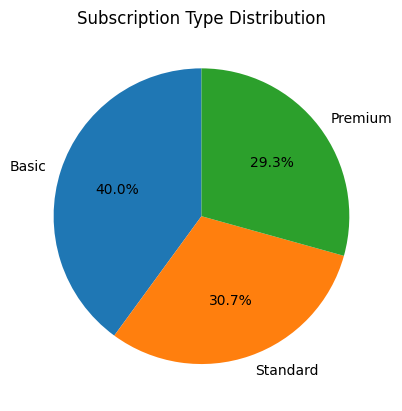

In [11]:
subscription=df["Subscription Type"].value_counts()
subscription.plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=False)
plt.title("Subscription Type Distribution")
plt.ylabel("")  
plt.show()

<Axes: xlabel='Subscription Type'>

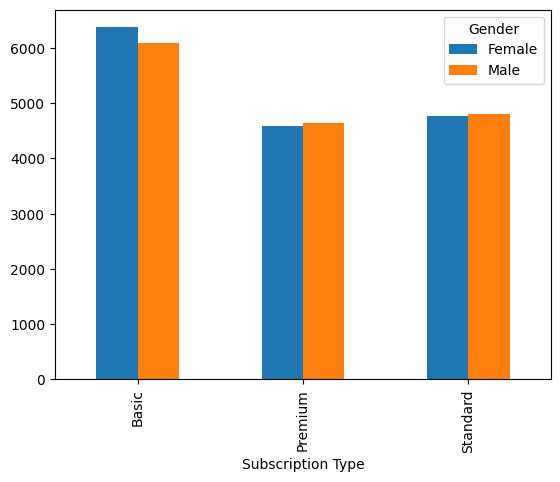

In [12]:
df.pivot_table(index='Subscription Type',columns='Gender',
               values='Monthly Revenue',aggfunc='sum').plot(kind='bar')

In [19]:
df['start month'] = df['Join Date'].dt.month
start_month_counts = df['start year'].value_counts().sort_index()
start_month_counts

start year
2021      14
2022    2448
2023      38
Name: count, dtype: int64

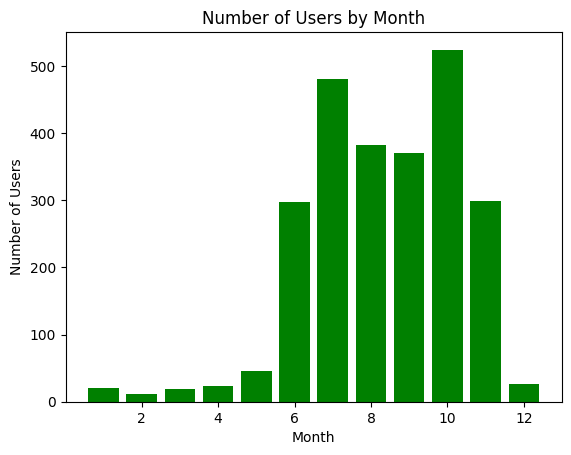

In [18]:
plt.bar(start_month_counts.index, start_month_counts,color='green')
plt.xlabel('Month')
plt.ylabel('Number of Users')
plt.title('Number of Users by Month')
plt.show()

***Revenue Analysis***

In [24]:
df.nsmallest(5,"Monthly Revenue")

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,start month,start year
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month,1,2022
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month,5,2023
7,8,Basic,10,2023-04-02,2023-06-24,Mexico,39,Female,Laptop,1 Month,4,2023
10,11,Basic,10,2022-05-16,2023-06-22,United States,31,Female,Smartphone,1 Month,5,2022
13,14,Basic,10,2022-08-01,2023-06-26,Australia,27,Male,Smartphone,1 Month,8,2022


In [25]:
df.nlargest(5,"Monthly Revenue")

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,start month,start year
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month,9,2021
5,6,Premium,15,2022-03-18,2023-06-27,France,29,Female,Smart TV,1 Month,3,2022
9,10,Premium,15,2023-01-07,2023-06-22,Italy,44,Female,Smart TV,1 Month,1,2023
11,12,Premium,15,2023-03-23,2023-06-28,Canada,45,Male,Tablet,1 Month,3,2023
15,16,Premium,15,2022-04-07,2023-06-27,France,36,Male,Tablet,1 Month,4,2022


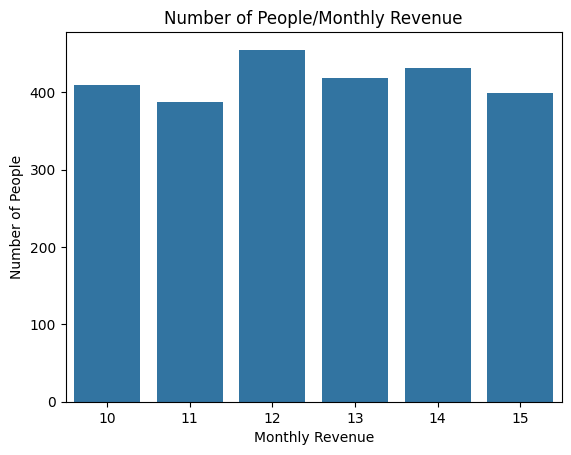

In [30]:
revenue = df['Monthly Revenue'].value_counts().reset_index()
sns.barplot(
    x='Monthly Revenue',
    y='count',
    data=revenue
)

plt.xlabel('Monthly Revenue')
plt.ylabel('Number of People')
plt.title('Number of People/Monthly Revenue')
plt.show()

<Axes: xlabel='Age', ylabel='Monthly Revenue'>

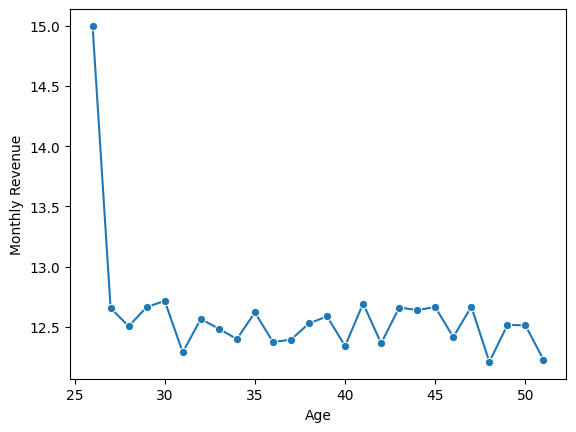

In [29]:
revenueByage = df.groupby('Age')['Monthly Revenue'].mean().reset_index()
sns.lineplot(x='Age', y='Monthly Revenue', data=revenueByage, marker='o')